 # <div style="text-align: center">Machine Learning Project On Candy Data   
 # <div style="text-align: center"> Linear Regression Model
#### <div style="text-align: right"> by MADHUSUDANAN SUBBARAO </div>  

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Importing Packages](#section3)<br>
4. [Exploratory Data Analysis](#section3)<br>
5. [Introduction to Linear Regression](#section4)<br>
    - 4.1 [First Step :  Setting variables](#section401)<br>
    - 4.2 [Second Step: Splitting our data](#sectiona402)<br>
    - 4.3 [Third step:  Training our model](#section403)<br>
    - 4.4 [Fourth step: Interpreting Coefficients](#section404)<br>
    - 4.5 [Fifth step: Making predictions based on above model](#section405)<br>
5. [Sixth Step: Model Evaluation](#section5)<br>
    - 5.1 [Model evaluation using metrics](#section501)<br>
    - 5.2 [Model Evaluation using Rsquared value.](#section502)<br>
6. [Seventh Step: Feature Selection](#section6)<br>
7. [Conclusion](#section7)<br>

<a id=section1></a>

## 1. Problem Statement

-  What’s the best (or at least the most popular) candy?  
-  Which combination of candy ranked among the best?
-  Which specific attribute contributes  more  to winpercent?



<a id=section2></a>

### 2. Data Loading and Description

# <img src="https://www.chegg.com/play/wp-content/uploads/sites/3/2012/10/halloween-candy-by-phanton-kitty-1.jpg" width="450" height="60" />

_This dataset is Copyright (c) 2014 ESPN Internet Ventures and distributed under an MIT license. Thanks to Walt Hickey for making the data available_.

_candy-data.csv includes attributes for each candy along with its ranking. For binary variables, 1 means yes, 0 means no. The data contains the following fields_:

- chocolate        -  Does it contain chocolate?
- fruity           -  Is it fruit flavored?
- caramel          -  Is there caramel in the candy?
- peanutalmondy    -  Does it contain peanuts, peanut butter or almonds?
- nougat           -  Does it contain nougat?
- crispedricewafer -  Does it contain crisped rice, wafers, or a cookie component?
- hard             -  Is it a hard candy?
- bar              -  Is it a candy bar?
- pluribus         -  Is it one of many candies in a bag or box?
- sugarpercent     -  The percentile of sugar it falls under within the data set.
- pricepercent     -  The unit price percentile compared to the rest of the set.
- winpercent       -  The overall win percentage according to 269,000 matchups.

_As we can see, we’re working with quite a small dataset here that contains certain attributes about the candies included in the internet based survey. Let’s now have a peek at some descriptive statistics_.


<a id=section3></a>

## 3. Importing Packages

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

#### Importing the Dataset

In [16]:
candy_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv')
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


<a id=section3></a>

## 3. Exploratory Data Analysis

In [17]:
candy_data.shape

(85, 13)

In [18]:
candy_data.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [19]:
candy_data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


###### There are 85 observation. Total 85 brands and  8 variety of candy's. 

In [20]:
candy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


__The good thing is there seems to have no missing values in our dataset__.

#### Sort based on winpercent 

In [22]:
candy_data.sort_values('winpercent',ascending = False).head(20)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


_Seems like Reese’s has dominated our top 10 candies! Another interesting finding on this ranking is that all candies in the top 10 contains chocolate and there is only two candys in our top 20 that doesn’t contain chocolate (Starburst & Skitties Original both has fruity taste). I believe chocolate and fruity taste is mutually exclusive, they just don’t go that well together_.

### Calculating and plotting heatmap correlation

In [80]:
candy_data.corr()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.104169,0.504675,0.636517
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.034393,-0.430969,-0.380938
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.221933,0.254327,0.213416
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109,0.087889,0.309153,0.406192
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.123081,0.153196,0.199375
crispedricewafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693,0.069950,0.328265,0.324680
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532,0.091810,-0.244365,-0.310382
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.099985,0.518407,0.429929
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000,0.045523,-0.220794,-0.247448
sugarpercent,0.104169,-0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.229151


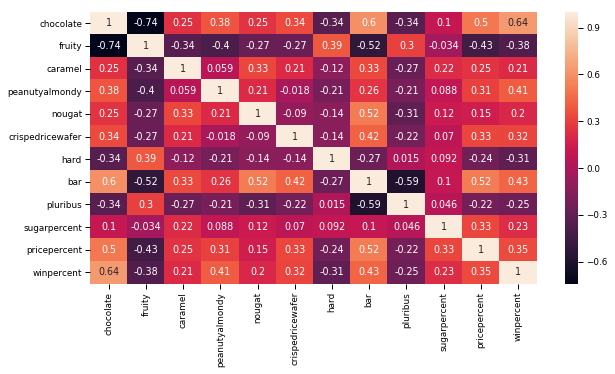

In [44]:
sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 1.0})
plt.figure(figsize=(10,5))
sns.heatmap( candy_data.corr(), annot = True)

Correlation Heatmap above shows some interesting insights. Chocolate, Peanutyalmondy, Crispedricewafer, and Bar has the highest correlation among our attributes with winning percentage. Seems like the best chocolate would be a twix with peanuts or almonds instead of caramel! But before we jump into that conclusion we should always remember that correlation does not imply causation!

Key Drivers Analysis via Linear Regression

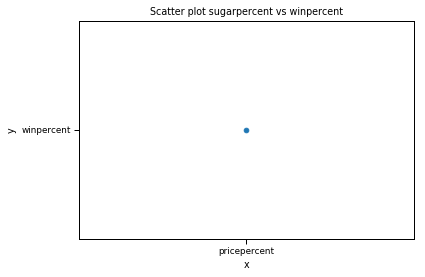

In [46]:
x = 'pricepercent'
y = 'winpercent'
plt.scatter(x, y,)
plt.title('Scatter plot sugarpercent vs winpercent')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

C:\Users\msubbarao.000\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


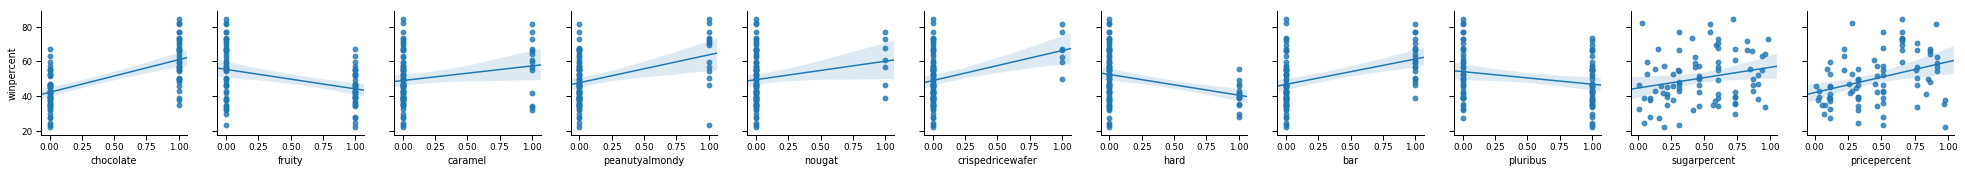

In [47]:
sns.pairplot(candy_data,x_vars =[ 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent'],y_vars = ['winpercent'],kind ='reg')

<a id=section4></a>

## 4. Introduction to Linear Regression

We will employ a linear regression analysis to find the significant factors that contributes to winning percentage

<a id=section401></a>

## 4.1 First Step :  Setting variables

In [23]:
candy_data.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [49]:
feature_cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent']
# Assign to X a subset of candy_data including feature columns
X = candy_data[feature_cols]

In [50]:
y = candy_data['winpercent']

<a id=section402></a>

## 4.2 Second Step: Splitting our data

_Splitting X & y into training and testing sets:_

_By passing our X and y variables into the train_test_split method, we are able to capture the splits in data by assigning 4 variables to the result._

In [51]:
#import SK Learn train test split
from sklearn.cross_validation import train_test_split

# Assign variables to capture train test s plit output
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

<a id=section403></a>

### 4.3 Third step:  Training our model

Firstly, importing of sklearn.linear_model is required for us to access LinearRegression. It then needs to be instantiated and model fit to our training data. This is seen below.

In [52]:
#Import SK Learn linear regression
from sklearn.linear_model import LinearRegression

# Instantiate
linreg = LinearRegression()

#Fit model to training data i.e) Learn Coefficients
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<a id=section404></a>

## 4.4 Fourth step: Interpreting Coefficients

_The coefficients will allow us to model our equation with values for our beta’s. The linreg variable (assigned to a LinearRegression object), is able to have the intercept and coefficients extracted, using the code below_.

In [53]:
#print y_intercept
print(linreg.intercept_)

#print the beta co-eficient in the same order as passed
print(linreg.coef_)


feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0,linreg.intercept_)


#zip can pair feature names and coefficients together

eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

#zip(feature_cols, linreg.coef_)

34.135742968476166
[18.92584064  8.05126009 -3.58659701  8.45203415  7.93401708 15.99830741
 -6.33077947 -4.73633764 -2.81719118 11.43430413 -0.77170981]
Intercept 34.135742968476166
chocolate 18.925840644845895
fruity 8.051260090122227
caramel -3.586597013935202
peanutyalmondy 8.452034151853493
nougat 7.934017078848616
crispedricewafer 15.998307412332554
hard -6.330779467799932
bar -4.736337641899254
pluribus -2.8171911783408845
sugarpercent 11.434304133971013
pricepercent -0.7717098121223664


_Extracting data from model_

The intercept will be your B0 value; and each coefficient will be the corresponding Beta for the X’s passed (in their respective order as shown above).

<a id=section405></a>

## 4.5 Fifth step: Making predictions based on above model

_Making predictions based on your model is as simple as using the code below: passing the predict method your test data. This will return predicted values of y given the new test X data_.

In [29]:
y_pred = linreg.predict(X_test)

## 5. Sixth Step: Model Evaluation

_There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE)_.

_MAE: The easiest to understand. Represents average error_

_MSE: Similar to MAE but noise is exaggerated and larger errors are “punished”. It is harder to interpret than MAE as it’s not in base units, however, it is generally more popular_.
    
_RMSE: Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. It is recommended that RMSE be used as the primary metric to interpret your model_.
    
_Below, you can see how to calculate each metric. All of them require two lists as parameters, with one being your predicted values and the other being the true values_.

<a id=section501></a>

## 5.1 Model Evaluation using metrics

In [54]:
# import metrics library
from sklearn import metrics

# print results of MAE
print('MAE for training set is {}'.format(metrics.mean_absolute_error(y_test, y_pred)))

# print results of MSE
print('MSE for training set is {}'.format(metrics.mean_squared_error(y_test, y_pred)))

# print results of RMSE
print('RMSE for training set is {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

MAE for training set is 10.464152742303973
MSE for training set is 167.05181735247967
RMSE for training set is 12.924852701384248


_visualising the  prediction vs target using scatter plot_.

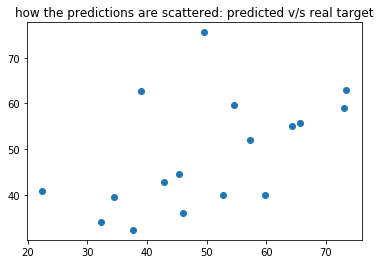

In [31]:
plt.scatter(y_test,y_pred)
plt.title('how the predictions are scattered: predicted v/s real target')
plt.show()

<a id=section502></a>

##  5.2 Model Evaluation using Rsquared value

In [55]:
R1 = linreg.predict(X_train)
SS_Residual = sum((y_train-R1)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1-(float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.5855129919383146 0.504095901069055


In [56]:
R1 = linreg.predict(X_test)
SS_Residual = sum((y_test-R1)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.16119612640823278 -1.684172395493655


__we have built a pretty robust regression model with an r-squared of 0.585 which implies that 58.55% of the variance of winpercent can be explained by the factors we have used. Coefficients were interpreted this way: e.g. On average, candies which contains chocolate is 18.9 percentage points higher in terms of winpercent compared to candies with no chocolate. One remarkable thing we can observe is that fruity taste has a relatively high positive coefficient which contradicts our correlation heatmap results wherein it is inversely proportional with winning percentage_.

<a id=section6></a>

## 6. Seventh Step: Feature Selection

### Model 2 - Removing pricepercent & sugarpercent from the feature cols


_Let’s have another regression run but this time retaining only our binary attributes discarding sugarpercent and pricepercent_.

In [58]:
feature_cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
# Assign to X a subset of candy_data including feature columns
X1 = candy_data[feature_cols]
y1 = candy_data['winpercent']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.20, random_state=1)

linreg = LinearRegression()

linreg.fit(X1_train,y1_train)

print(linreg.intercept_)
print(linreg.coef_)
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0,linreg.intercept_)
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

y1_pred = linreg.predict(X1_test)
           
print('MAE for training set is {}'.format(metrics.mean_absolute_error(y1_test, y1_pred)))
# print results of MSE
print('MSE for training set is {}'.format(metrics.mean_squared_error(y1_test, y1_pred)))
# print results of RMSE
print('RMSE for training set is {}'.format(np.sqrt(metrics.mean_squared_error(y1_test,y1_pred))))

37.345892160408695
[19.01721881  8.97118296 -2.22747853  9.87628002  8.44845764 15.98888327
 -5.30714785 -3.93969314 -1.35114732]
Intercept 37.345892160408695
chocolate 19.01721880869512
fruity 8.971182957611555
caramel -2.2274785287687946
peanutyalmondy 9.876280016868522
nougat 8.448457641168677
crispedricewafer 15.988883267195826
hard -5.307147846979776
bar -3.9396931413933243
pluribus -1.3511473234378317
MAE for training set is 10.058487015379015
MSE for training set is 150.13487201193945
RMSE for training set is 12.25295360359858


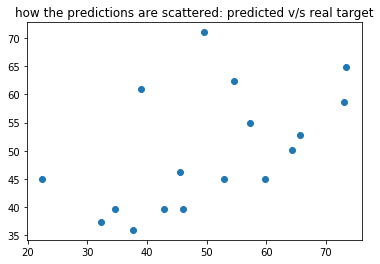

In [59]:
plt.scatter(y1_test,y1_pred)
plt.title('how the predictions are scattered: predicted v/s real target')
plt.show()

### Using  R-Squared & Adjusted R-Squared

In [60]:
R2 = linreg.predict(X1_train)
SS_Residual = sum((y1_train-R2)**2)
SS_Total = sum((y1_train-np.mean(y1_train))**2)
r_squared = 1-(float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y1_train)-1)/(len(y1_train)-X1_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.5465244553896055 0.47615756053626834


In [61]:
R2 = linreg.predict(X1_test)
SS_Residual = sum((y1_test-R2)**2)
SS_Total = sum((y1_test-np.mean(y1_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.24613982535072576 -0.7231089706269125


__We cannot see much of a difference here from the previous regression, but it is interesting to see that fruity still has a positive coefficient and almost catching up to peanutyalmondy as key driver of winpercent having a higher estimated coefficient__.

<a id =section7> </a>

## 7. Conclusion

-  We can conclude that, on the total variance explained by our model a little less than half of it is due to the attribute chocolate. 
-  Results also cemented our previous hypothesis that chocholate is the single most important attribute of a candy followed by peanutyalmondy.
-  Above can be confirmed based on ranking of the winpercent(__ref sec 3.EDA__)which shows the chocolate was the major contributor of the competitor with top 10 winpercent.
-  It is quite notable that fruity has secured the fourth rank despite having a negative correlation with winpercent. 
-  Candies which has a combination of peanutyalmondy & chocolate and crispedricewafer with chocolate has better preference.
-  Candies with caramel and nougat doesn’t appeal that much with the respondents.